In [2]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import oneshot as sm
import rfm, skipRFM, deepSkip, localSkip_2_2, localSkip_12_1, localSkip_4_1, localSkip_8_1, localSkip_48_1, localSkip_16_1, localSkip_24_1
import localSkip_1_8, localSkip
# import parallel_euler as arch1
import torch, time
from torch import nn
import ks, l63, l96, ks_torch, ks0
import config
# warnings.filterwarnings('ignore'

dynamical_system = 'L96'

Uo = torch.tensor(np.load(f'../data/{dynamical_system}/train.npy'))[:,:100000]
Vo = torch.tensor(np.load(f'../data/{dynamical_system}/test.npy'))


L0, L1 = 0.4, 3.5
D, D_r, B = 3, 128, 1
beta = 1e-6
data_folder = '../data'
G, I = 1, 1                                                                                                             
# train, test = l96.gen_data(save_folder='../data/L96-trajectories')
drf_args = [2048, 1, L0, L1, Uo, beta, 'LocalSkip', f'{data_folder}/localSkipKS/depth-{B}', False, G, I]
batch = localSkip.BatchDeepRF(Uo, Vo, *drf_args)
start = time.time()
batch.drf.learn(Uo, 42)
end = time.time()
print(f"Time taken = {end-start}s")
kwargs = {'error_threshold': 0.25, 'dt': 0.01, 'Lyapunov_time': 1/2.27}
# tau = drf.compute_tau_f(Vo[:100], **)
# tau = drf.compute_tau_f(Vo[:100], **{'error_threshold' : 0.09, 'dt': 0.01, 'Lyapunov_time': 1/2.27})
# tau[0].mean()
# batch.get_tau_f(batch.drf, Uo, **kwargs[L])
# eval = batch.drf.multistep_forecast(Vo[0][:, 0], 150000)
# std = Vo[0].std(axis=1)
# diff = ((Vo[0][:, :] - eval[:, :])**2 / std[:, None]**2).mean(axis=0)
# plt.plot(np.arange(len(diff)), diff)
# plt.axhline(0.25)
print(batch.drf.compute_tau_f(Vo[:500], **kwargs)[0].mean())

Time taken = 1.9742050170898438s
Time taken by compute_tau_f is 117.8356 seconds
tensor(3.6340)


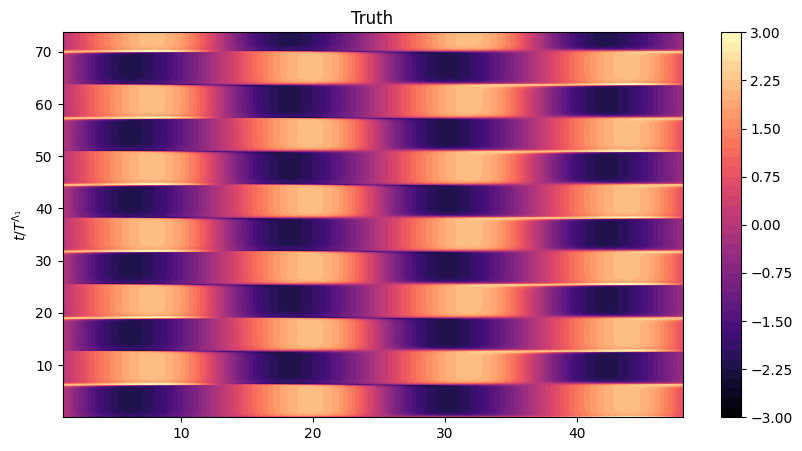

In [10]:
i = np.random.randint(100000-1000)
ut.waterfall(Uo[:, i:i+5000], filename=f"KS-{L}-train-partial", levels=50,  **kwargs[L])

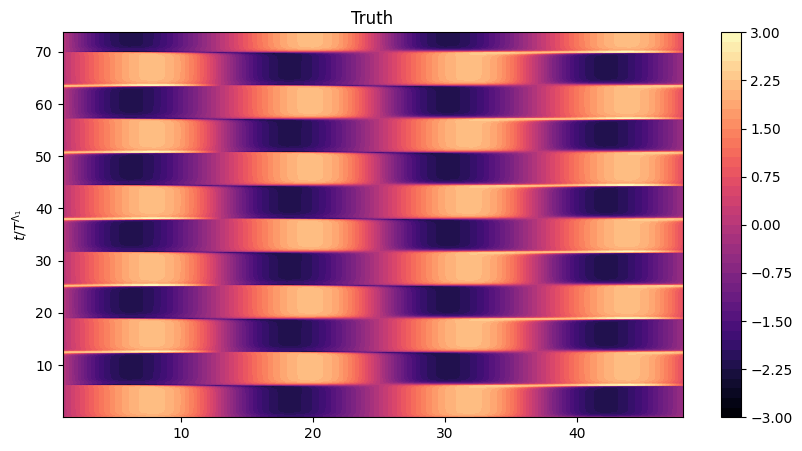

In [9]:
i = np.random.randint(1)
ut.waterfall(Vo[i][:, :5000], filename=f"KS-{L}-test", levels=50,  **kwargs[L])

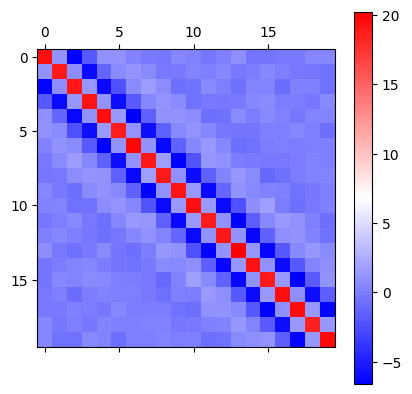

In [3]:
im = plt.matshow(np.cov(Uo)[:20, :20], cmap='bwr')
plt.colorbar(im)
plt.savefig(f"../data/plots/L96-cov-partial.png", bbox_inches='tight', dpi=300)

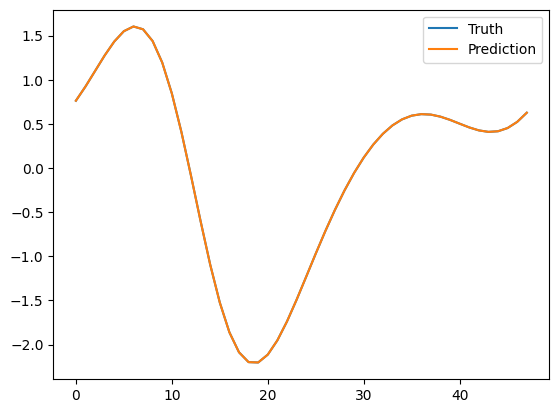

In [14]:
D, l, t = 48, 1, 25000
plt.plot(range(D), Vo[0][:, t], label="Truth")
plt.plot(range(D), eval[:, t], label="Prediction")
plt.legend()

In [16]:
for D_r, B in [[1024, 1], [1024, 2], [1024, 4], [1024, 8], [1024, 16], [4096, 1], [4096, 2], [4096, 4], [4096, 8]]:
    data = ut.get_data('L63', 1, 'DeepSkip', D_r, B)
    y = data['tau_f_nmse'].min()
    print(f'{D_r}, {B}, {y}')

for D_r, B in [[512, 1], [1024, 1], [2048, 1], [4096, 1], [8192, 1], [16384, 1]]:
    data = ut.get_data('L63', 1, 'SkipRFM', D_r, B)
    y = data['tau_f_nmse'].min()
    print(f'{D_r}, {B}, {y}')

for D_r, B in [[512, 1], [1024, 1], [2048, 1], [4096, 1], [8192, 1], [16384, 1]]:
    data = ut.get_data('L63', 1, 'RFM', D_r, B)
    y = data['tau_f_nmse'].min()
    print(f'{D_r}, {B}, {y}')

0.6815

In [3]:
a = np.random.normal(size=(3, 4))

In [5]:
a[0,...]

array([ 0.8594465 ,  0.76970808, -0.44920507,  0.44890045])

In [56]:
batch.drf.net.idx[0]

tensor([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,  0,  1,  2,  3,  4,  5,
         6,  7,  8,  9, 10, 11, 12])

In [9]:
Uo.shape

torch.Size([512, 100000])

In [13]:
a = Uo.T[..., batch.drf.net.idx[0]]

In [11]:
Vo.shape

torch.Size([100, 512, 1000])

In [8]:
Vo.T.shape

torch.Size([1000, 512, 100])

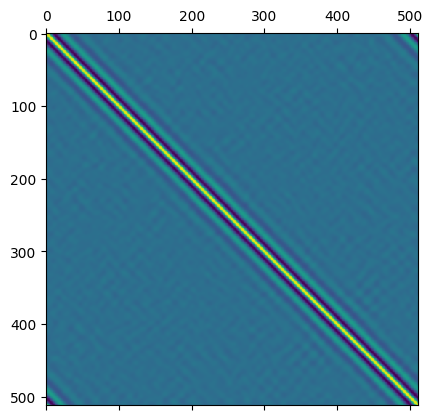

In [16]:
plt.matshow(np.cov(Vo.transpose(1, 2).flatten(0, 1).T))

In [17]:
112.4933/(0.003*0.25)

149991.06666666668

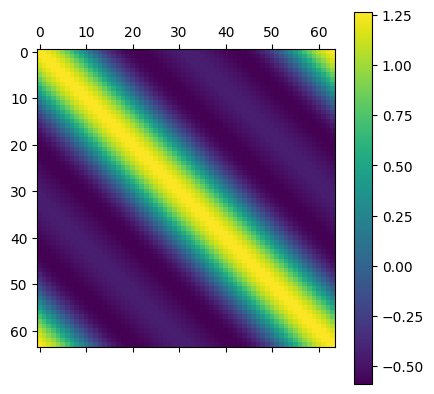

In [27]:
im = plt.matshow(np.cov(Uo))
plt.colorbar(im)

In [14]:
Uo.shape

torch.Size([7, 150000])

In [49]:
100000*0.25*0.003

75.0

In [31]:
66*550/64

567.1875

In [52]:
4.5*1e5*250

112500000.0

In [68]:
np.random.randint(1)

0

In [4]:
d = {0: [[4096, 1, 1, 1], [4096, 1, 1, 2], [4096, 1, 1, 3]], 1: [[4096, 1, 2, 1], [4096, 1, 2, 2], [4096, 1, 2, 3]]}
dl, bl, gl, il = list(zip(*d[0]))

In [5]:
dl

(4096, 4096, 4096)

In [6]:
gl

(1, 1, 1)

In [8]:
x = f"{data_folder}/{dynamical_system}/{1}/LocalSkip/beta"

In [13]:
x[:-5] + f'_{G}_{I}' + x[-5:]

'../data/L96/1/LocalSkip_1_3/beta'

In [14]:
isinstance(2, int)

True